<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/DecisionTree_RashmiSarode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 257: Assignment Week 4
## Decision Tree
Bank Loan Approval Prediction using Decision Tree.

We applied logistic regression on the dataset for loan approval prediction problem and got accuracy as 0.74.

We are trying to check with decision tree, if we are getting better accuracy or not.

# Import all the required libraries :

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
%matplotlib inline

# Data Loading and Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls ./drive/My\ Drive/datasets/loan-prediction

lending-club	   test_Y3wMUE5_7gLdaTN.csv
SPSS_loan_roc.sav  train_u6lujuX_CVtuZ9i.csv


In [ ]:
filePath = "/content/drive/My Drive/datasets/loan-prediction/train_u6lujuX_CVtuZ9i.csv"
testPath = "/content/drive/My Drive/datasets/loan-prediction/test_Y3wMUE5_7gLdaTN.csv"

In [ ]:
df = pd.read_csv(filePath)
test = pd.read_csv(testPath)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Checking which columns contains NaN values in it :

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Removing all the null values

In [ ]:
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=1)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.tail()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
609,LP002978,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,1
611,LP002983,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1,1
613,LP002990,0,4583,0.0,133.0,360.0,0.0,0,0,0,1,1,0,0


In [ ]:
def check_nan():
  for col in df.columns.values:
    if df[col].isnull().values.any():
      print(col + ' ' + str(df[col].isnull().sum()))

In [ ]:
check_nan()

Dependents 15
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


In [ ]:
df['Dependents'] = df['Dependents'].str.replace('+', '')
df['Dependents'] = df['Dependents'].fillna(0)
df['Dependents'] = df['Dependents'].astype(int)
df['Dependents'] = df['Dependents'].fillna(0)
df['Credit_History'] = df['Credit_History'].fillna(0)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df["Sum_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.drop(['Loan_ID'], axis=1, inplace=True)
check_nan()

LoanAmount 22


In [ ]:
df.shape

(614, 14)

In [ ]:
df = df.dropna()
df.shape

(592, 14)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Sum_Income
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,6091.0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1,3000.0
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1,4941.0
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1,6000.0
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1,9613.0
6,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1,1,3849.0
7,3,3036,2504.0,158.0,360.0,0.0,1,1,0,0,1,0,0,5540.0
8,2,4006,1526.0,168.0,360.0,1.0,1,1,0,0,0,1,1,5532.0
9,1,12841,10968.0,349.0,360.0,1.0,1,1,0,0,1,0,0,23809.0
10,2,3200,700.0,70.0,360.0,1.0,1,1,0,0,0,1,1,3900.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               592 non-null    int64  
 1   ApplicantIncome          592 non-null    int64  
 2   CoapplicantIncome        592 non-null    float64
 3   LoanAmount               592 non-null    float64
 4   Loan_Amount_Term         592 non-null    float64
 5   Credit_History           592 non-null    float64
 6   Gender_Male              592 non-null    uint8  
 7   Married_Yes              592 non-null    uint8  
 8   Education_Not Graduate   592 non-null    uint8  
 9   Self_Employed_Yes        592 non-null    uint8  
 10  Property_Area_Semiurban  592 non-null    uint8  
 11  Property_Area_Urban      592 non-null    uint8  
 12  Loan_Status_Y            592 non-null    uint8  
 13  Sum_Income               592 non-null    float64
dtypes: float64(5), int64(2), u

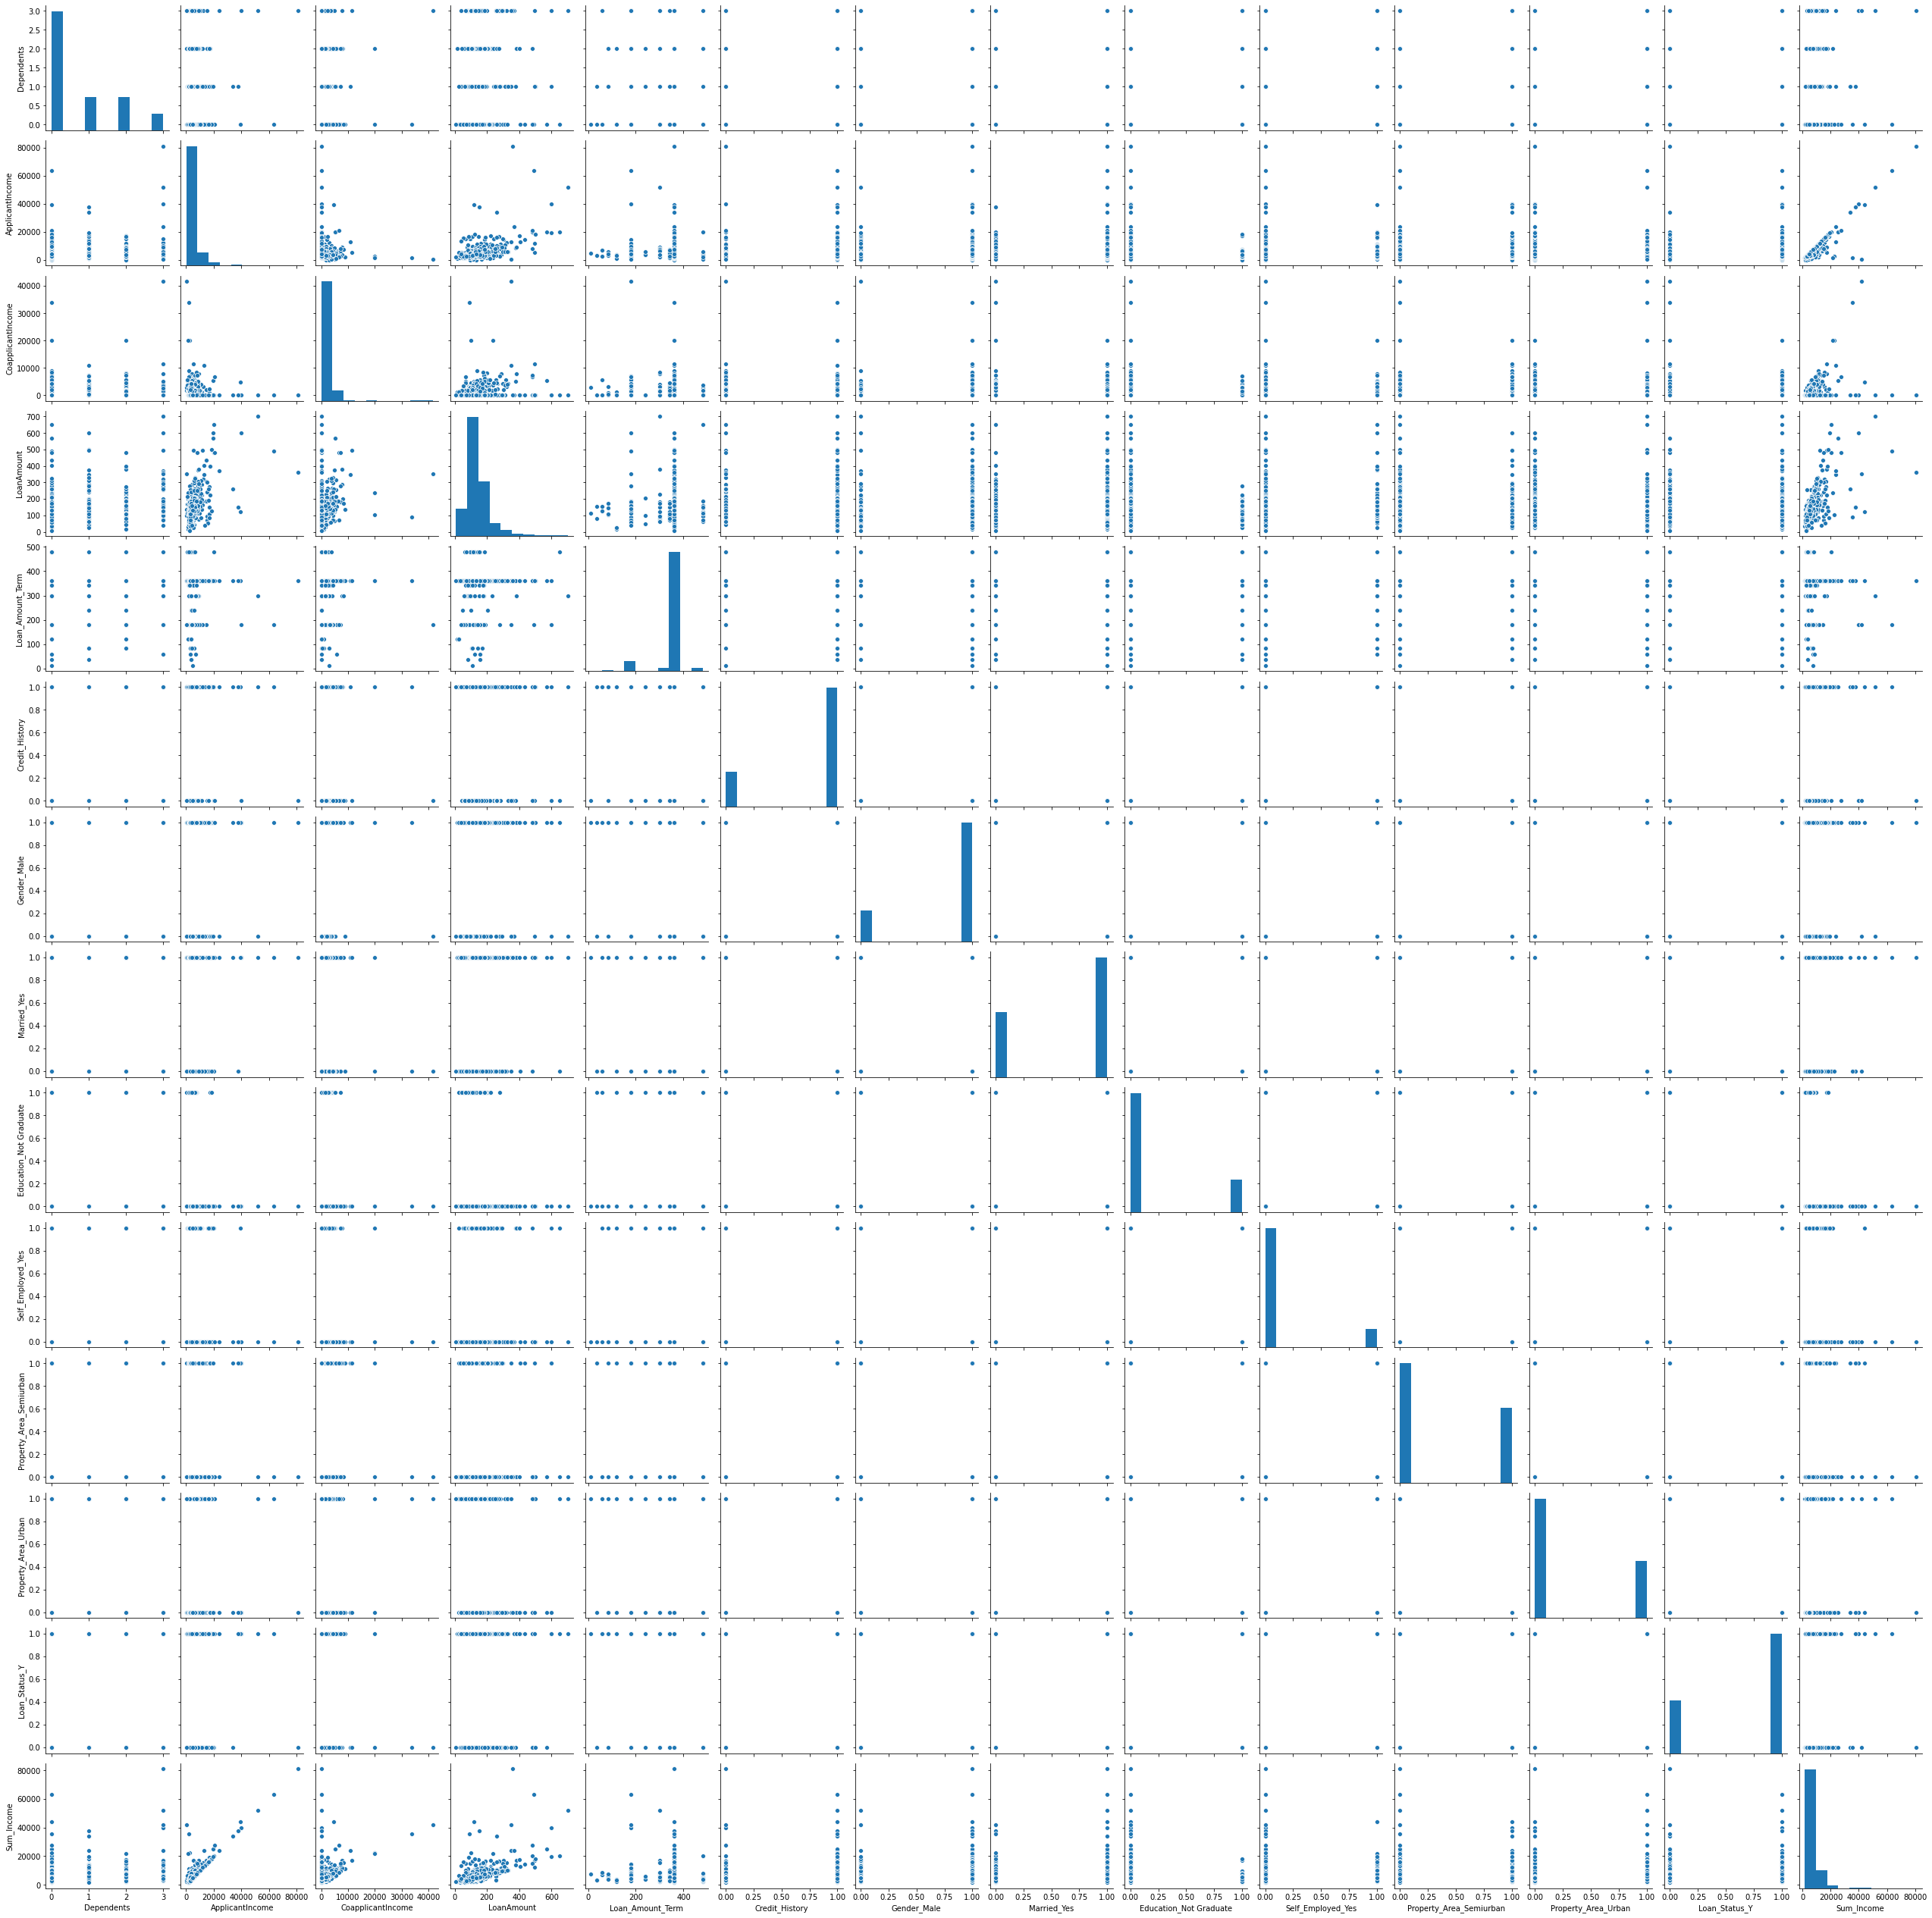

In [ ]:
seabornInstance.pairplot(df)

# Correlation Coefficients Heatmap

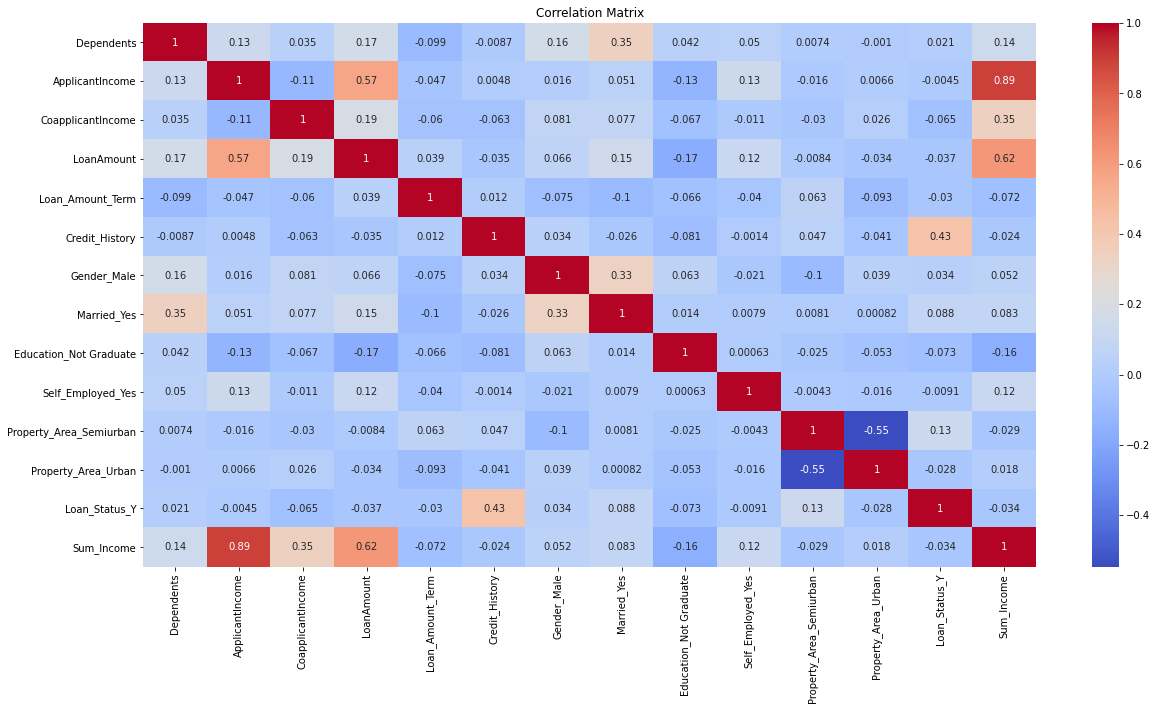

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix')
seabornInstance.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Figure size 5040x4320 with 0 Axes>

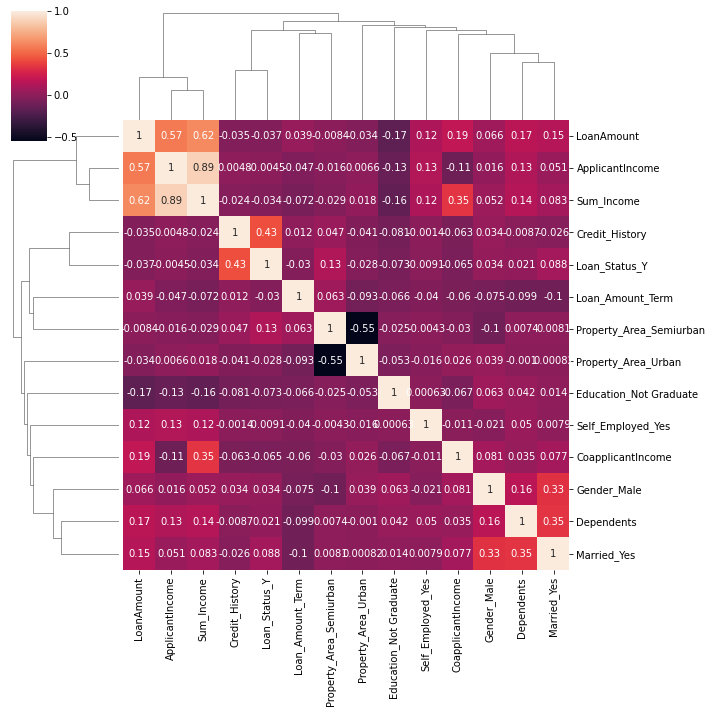

In [ ]:
plt.figure(figsize=(70,60))
seabornInstance.clustermap(df.corr(),annot=True)

By visualizing our data with Heatmap, we found a strong correlation between variuous features available in the dataset. Such as:
- Total Income is hoghly correlated to the loan amount.
- Credit history is highly correlated to the loan status.

But, It didn't provide us much clarity about the correlation between the other columns. So we used Feature Importance technique to get to know a score for the input features based on how useful they are at predicting our target variable. Here, our target variable is Loan Status.


# Feature Importance

In [ ]:
y = df['Loan_Status_Y']

In [ ]:
df.drop(['Loan_Status_Y'], axis=1, inplace=True)

[0.06067448 0.14831264 0.10773849 0.15000599 0.05717707 0.17858758
 0.02684748 0.02036785 0.02587986 0.02782025 0.02743789 0.02304165
 0.14610877]


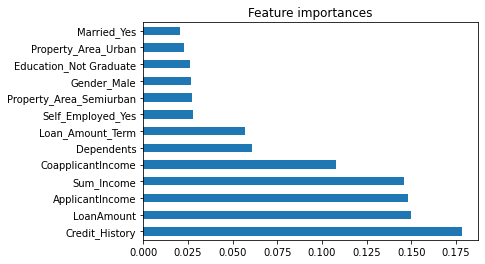

In [ ]:
model = ExtraTreesClassifier(criterion='gini') # “gini” for the Gini impurity and “entropy” for the information gain.
model.fit(df, y)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature importances")
plt.show()

In [ ]:
feat_importances

Dependents                 0.060674
ApplicantIncome            0.148313
CoapplicantIncome          0.107738
LoanAmount                 0.150006
Loan_Amount_Term           0.057177
Credit_History             0.178588
Gender_Male                0.026847
Married_Yes                0.020368
Education_Not Graduate     0.025880
Self_Employed_Yes          0.027820
Property_Area_Semiurban    0.027438
Property_Area_Urban        0.023042
Sum_Income                 0.146109
dtype: float64

Based on the Gini Importance of the features, it's obvious that credit history, sum of applicant and coapplicant incomes, and loan amount are the most important factors to predict the loan approval.

# Train and Split data

In [ ]:
X = df[['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Sum_Income']]
print(X.columns)


Index(['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Sum_Income'],
      dtype='object')


Checking the average value of the 'Loan_Status' column

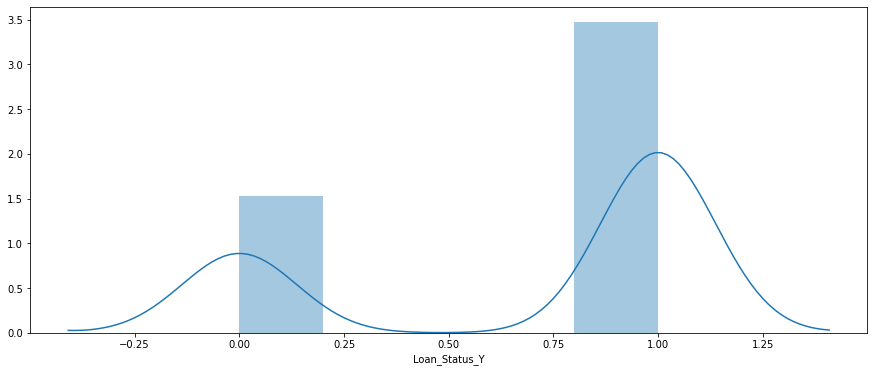

In [ ]:
plt.figure(figsize=(15,6))
plt.tight_layout()
seabornInstance.distplot(y)

 Splitting 80% of the data to the training set while 20% of the data to test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training model using Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 7, random_state = 0)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
clf.get_depth()

7

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7394957983193278

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(40)
df1.head(30)

,Actual,Predicted
255,1,0
278,1,1
599,1,1
151,1,1
357,0,1
473,1,0
439,1,1
607,1,1
110,1,1
365,0,1


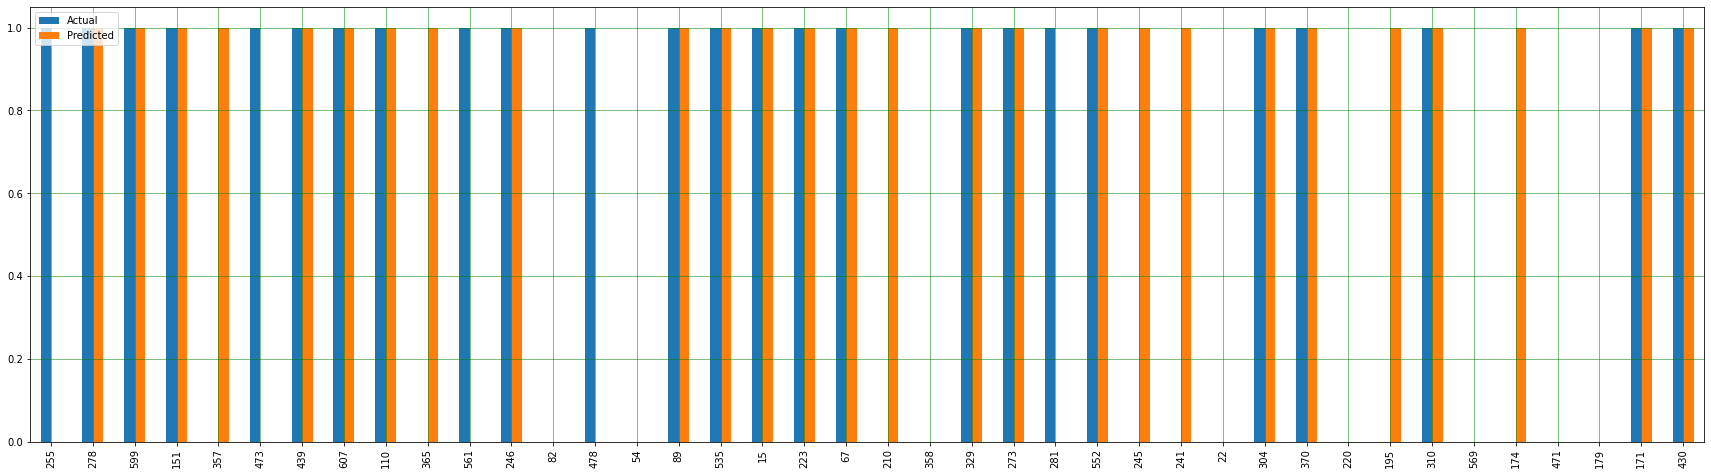

In [ ]:
df1.plot(kind='bar',figsize=(30,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22 18]
 [13 66]]
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        40
           1       0.79      0.84      0.81        79

    accuracy                           0.74       119
   macro avg       0.71      0.69      0.70       119
weighted avg       0.73      0.74      0.73       119



Decision Tree is one of the predictive modelling approaches. So based on our business case we thought this classificaion might be useful for us to predict whether the loan should be approved or not for an applicant based on various features available in our dataset. 

On comparing the accurancy of the Decision Tree (0.74) with the Logistic Regression (0.74) we learned that both the classification approaches seems suitable for us.

We are performing data amalgamation and will perform different algorithms for the new dataset and then compare the result. 



References:

https://colab.research.google.com/drive/1qfDT6Cx62q6rmxBdl1fTpJGwaBIefSI2

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html